In [121]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [122]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate random features (2 features)
X = np.random.randn(1000, 2)

# Create a linear boundary with added noise
# The true decision boundary is defined by: 2*x1 + 3*x2 - 1 > 0
y = (2 * X[:, 0] + 3 * X[:, 1] - 1 > 0).astype(int).reshape(-1, 1)

In [123]:
def plot_graph(w1, w2, b):
    # Plot the data
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y.ravel() == 0, 0], X[y.ravel() == 0, 1], color='blue', label='Class 0', edgecolor='k')
    plt.scatter(X[y.ravel() == 1, 0], X[y.ravel() == 1, 1], color='red', label='Class 1', edgecolor='k')
    
    # Define the true decision boundary: 2*x1 + 3*x2 - 1 = 0
    x1 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
    x2 = (1 - 2 * x1) / 3  # Rearrange the equation to solve for x2

    xd = (-b - w1 * x1)/w2
    
    # Plot the decision boundary
    plt.plot(x1, x2, color='black', linewidth=2, label='True Decision Boundary')
    plt.plot(x1, xd, color='blue', linewidth=2, label='Predicted Decision Boundary')
    
    # Add labels, legend, and title
    plt.title("Generated Data and True Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    # plt.grid(True)
    plt.show()

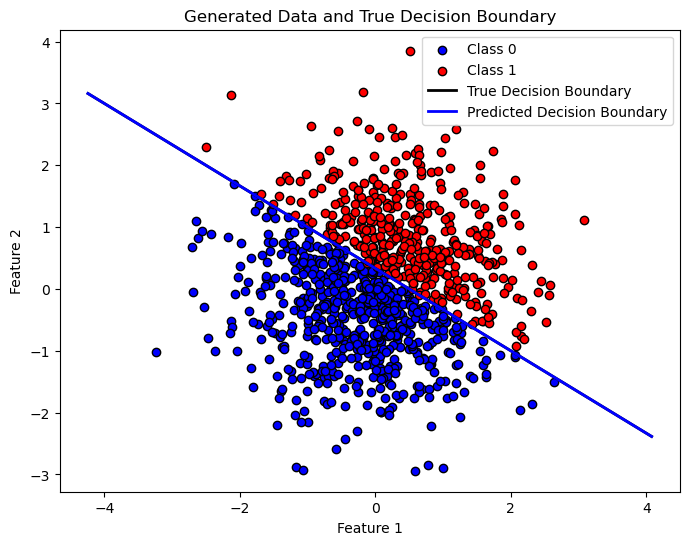

In [124]:
plot_graph(2, 3, -1)

In [125]:
X = torch.from_numpy(X).to(torch.float32)
y = torch.from_numpy(y).to(torch.float32)
X.shape, y.shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

In [126]:
class LogisticRegression(nn.Module):
    def __init__(self, in_feats, out_feats):
        super().__init__()
        self.linear = nn.Linear(in_feats, out_feats)
        self.w = self.linear.weight
        self.b = self.linear.bias
        return

    def forward(self, x):
        x = self.linear(x)
        x = torch.sigmoid(x)
        return x

In [127]:
model = LogisticRegression(2, 1)

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1)

for i in range(1000):
    # fwd pass
    y_pred = model(X)

    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if (i + 1) % 100 == 0:
        print(f'loss at iteration {i} = {loss}')

print(f'weights w1={w1}, w2={w2}, b={b}')

loss at iteration 99 = 0.2786827087402344
loss at iteration 199 = 0.21208299696445465
loss at iteration 299 = 0.1807601898908615
loss at iteration 399 = 0.1614464372396469
loss at iteration 499 = 0.14794552326202393
loss at iteration 599 = 0.1377883404493332
loss at iteration 699 = 0.12976743280887604
loss at iteration 799 = 0.12321193516254425
loss at iteration 899 = 0.11771491914987564
loss at iteration 999 = 0.11301282048225403
weights w1=0.3008057475090027, w2=-0.08719027787446976, b=0.04411999508738518


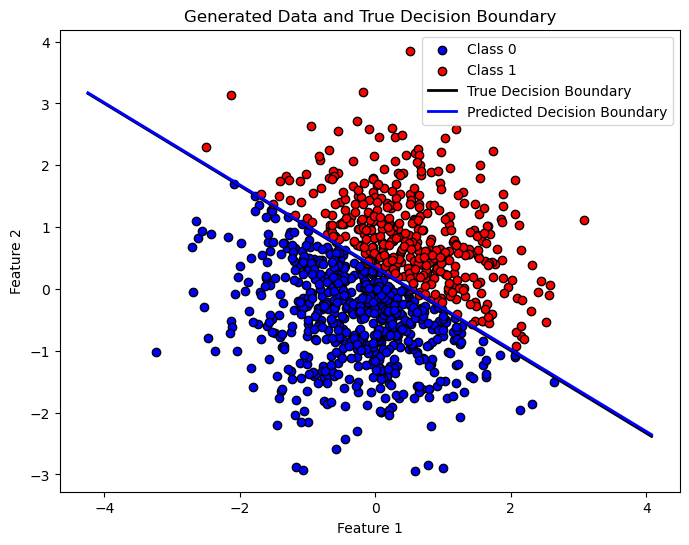

In [128]:
w1, w2, b = model.w[0][0].item(), model.w[0][1].item(), model.b[0].item()
plot_graph(w1, w2, b)